In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
data=pd.read_csv('/content/newbabith.csv')

In [ ]:
data


,Gender,Qualification,Passout,Origin,Experience,Company_type,Status
0,Male,Bachelor Degree,2007,Urban,9,Private limited company,Employed
1,Male,Diploma,2010,Urban,9,Private limited company,Employed
2,Male,Diploma,2014,Urban,5,Private limited company,Employed
3,Male,PUC,2014,Remote,1,Private limited company,Employed
4,Male,Bachelor Degree,2017,Urban,3,Private limited company,Employed
...,...,...,...,...,...,...,...
496,Female,PG,2020,Rural,1,Not yet working,Unemployed
497,Female,PG,2020,Semi urban,1,Not yet working,Unemployed
498,Female,Diploma,2021,Semi urban,1,Not yet working,Unemployed
499,Female,Diploma,2021,Semi urban,1,Private limited company,Unemployed


In [ ]:
data1=data.copy()

In [ ]:
data1


,Gender,Qualification,Passout,Origin,Experience,Company_type,Status
0,Male,Bachelor Degree,2007,Urban,9,Private limited company,Employed
1,Male,Diploma,2010,Urban,9,Private limited company,Employed
2,Male,Diploma,2014,Urban,5,Private limited company,Employed
3,Male,PUC,2014,Remote,1,Private limited company,Employed
4,Male,Bachelor Degree,2017,Urban,3,Private limited company,Employed
...,...,...,...,...,...,...,...
496,Female,PG,2020,Rural,1,Not yet working,Unemployed
497,Female,PG,2020,Semi urban,1,Not yet working,Unemployed
498,Female,Diploma,2021,Semi urban,1,Not yet working,Unemployed
499,Female,Diploma,2021,Semi urban,1,Private limited company,Unemployed


In [ ]:
x=data1.drop('Status',axis=1)


In [ ]:
x

,Gender,Qualification,Passout,Origin,Experience,Company_type
0,Male,Bachelor Degree,2007,Urban,9,Private limited company
1,Male,Diploma,2010,Urban,9,Private limited company
2,Male,Diploma,2014,Urban,5,Private limited company
3,Male,PUC,2014,Remote,1,Private limited company
4,Male,Bachelor Degree,2017,Urban,3,Private limited company
...,...,...,...,...,...,...
496,Female,PG,2020,Rural,1,Not yet working
497,Female,PG,2020,Semi urban,1,Not yet working
498,Female,Diploma,2021,Semi urban,1,Not yet working
499,Female,Diploma,2021,Semi urban,1,Private limited company


In [ ]:
y=data1['Status']


In [ ]:
y.head()

0    Employed
1    Employed
2    Employed
3    Employed
4    Employed
Name: Status, dtype: object

In [ ]:
x.isnull().sum()


Gender           0
Qualification    0
Passout          0
Origin           0
Experience       0
Company_type     0
dtype: int64

In [ ]:
y.isnull().sum()


0

In [ ]:
x['Company_type'].unique()

array(['Private limited company', 'Corporative', 'Partnership',
       'International company', 'Not yet working',
       'Nonprofit Organization', 'Private institution'], dtype=object)

In [ ]:
x['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
x['Gender'] = le.fit_transform(x['Gender'])


In [ ]:
x['Qualification']=le.fit_transform(x['Qualification'])
x['Origin']=le.fit_transform(x['Origin'])
x['Company_type']=le.fit_transform(x['Company_type'])


In [ ]:
x['Company_type'].unique()


array([6, 0, 4, 1, 3, 2, 5])

In [ ]:
y.unique()


array(['Employed', 'Unemployed'], dtype=object)

In [ ]:
y=y.map({'Employed':1,'Unemployed':0})


In [ ]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [ ]:
from sklearn.linear_model import LogisticRegression
l_regressor = LogisticRegression()
l_regressor.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = l_regressor.predict(x_test)


In [ ]:
y_pred


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
496    0
497    0
498    0
499    0
500    0
Name: Status, Length: 501, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8316831683168316


In [ ]:
x

,Gender,Qualification,Passout,Origin,Experience,Company_type
0,1,1,2007,3,9,6
1,1,2,2010,3,9,6
2,1,2,2014,3,5,6
3,1,4,2014,0,1,6
4,1,1,2017,3,3,6
...,...,...,...,...,...,...
496,0,3,2020,1,1,3
497,0,3,2020,2,1,3
498,0,2,2021,2,1,3
499,0,2,2021,2,1,6


In [ ]:
new_data=pd.DataFrame({
    'Gender':0, # 1=Male, 0=Female
    'Qualification':2,
    'Passout':2007,
    'Origin':3,
    'Experience':9,
    'Company_type':1,
},index=[0])

In [ ]:
lr=LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [ ]:
p=lr.predict(new_data)

if p==1:
    print('Employed')
else :
    print('Unemployed')

Employed


In [ ]:
pip install seaborn


In [ ]:
import seaborn as sns

In [ ]:
x1=x.copy()


In [ ]:
x1['Status']=y


<Axes: xlabel='Passout', ylabel='count'>

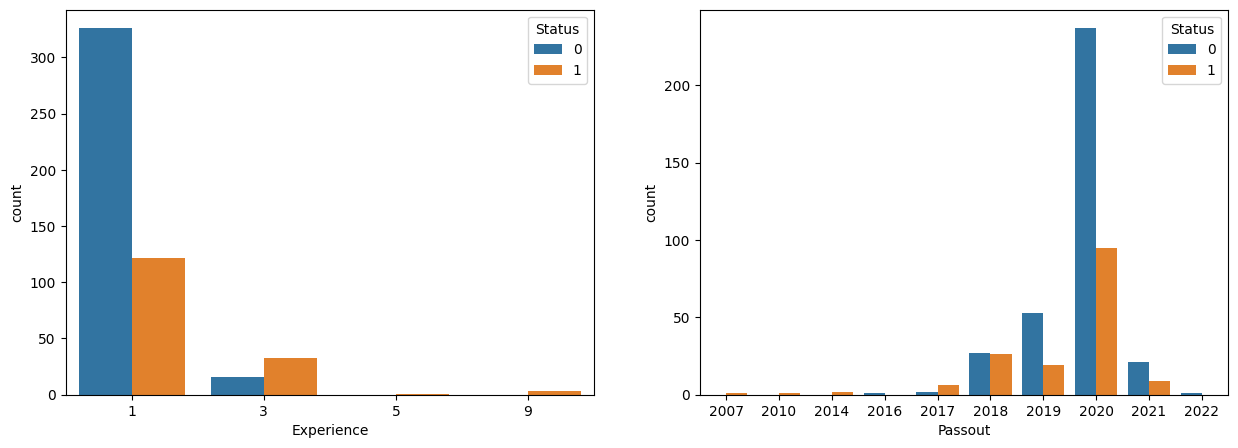

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='Experience',hue='Status',data=x1)
plt.subplot(1,2,2)
sns.countplot(x='Passout',hue='Status',data=x1)

<Axes: xlabel='Origin', ylabel='count'>

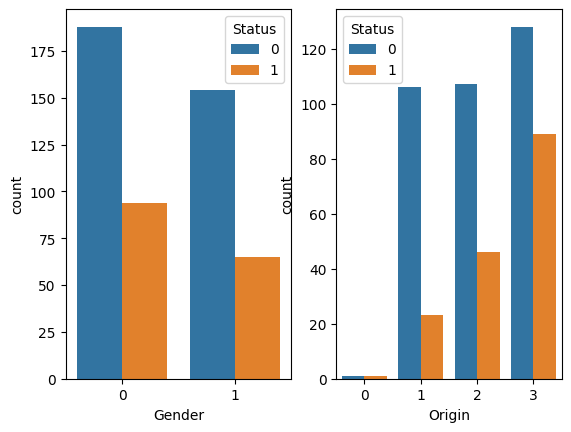

In [ ]:
plt.subplot(1,2,1)
sns.countplot(x='Gender',hue='Status',data=x1)
plt.subplot(1,2,2)
sns.countplot(x='Origin',hue='Status',data=x1)

<Axes: xlabel='Company_type', ylabel='count'>

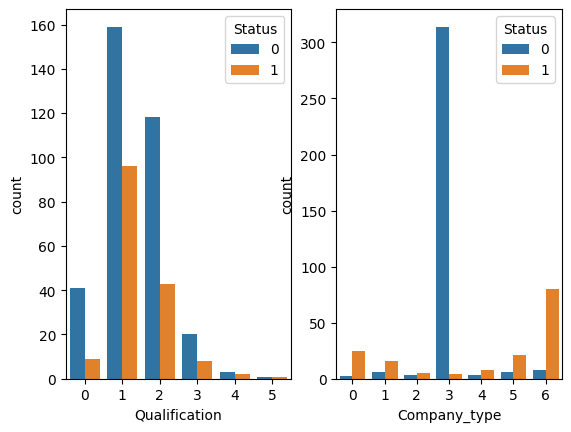

In [ ]:
plt.subplot(1,2,1)
sns.countplot(x='Qualification',hue='Status',data=x1)
plt.subplot(1,2,2)
sns.countplot(x='Company_type',hue='Status',data=x1)